In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# read csv files
df_emp = pd.read_csv('../../Data/Downloaded_Old/post_emp.csv')
df_GDP = pd.read_csv('../../Data/Downloaded_Old/post_GDP.csv')
df_cns = pd.read_csv('../../Data/Downloaded_Old/post_real_cns.csv')

In [3]:
# parameters
α_KA  = 0.15
α_LA  = 0.55
α_KM  = 0.66
α_LM  = 0.34
η     = 0.15
γ_pre = 60
#γ_post = 76.4
γ_post = 68.8 
δ     = 0.05
β     = 0.96

In [4]:
# create the ratio of marginal utility
df_cns['cA-γ/cM'] = (df_cns['real_food_cns'] - γ_post) / df_cns['real_non_food_cns']
df_cns['mu_M/mu_A'] = (1-η) / η * df_cns['cA-γ/cM']

In [5]:
df_GDP_emp = pd.merge(df_GDP, df_emp, on = 'year_wst')

In [6]:
df_GDP_emp_picked = df_GDP_emp[['year_wst', 'prm_GDP', 'non_prm_GDP', 'prm_emp', 'non_prm_emp']].copy()

In [7]:
df_GDP_emp_picked['F_LA'] = α_LA * df_GDP_emp_picked['prm_GDP'] / df_GDP_emp_picked['prm_emp'] 

In [8]:
df_GDP_emp_picked['F_LM'] = α_LM * df_GDP_emp_picked['non_prm_GDP'] / df_GDP_emp_picked['non_prm_emp'] 

In [9]:
# get the ratio of labor productivity
df_GDP_emp_picked['F_LM/F_LA'] = df_GDP_emp_picked['F_LM'] / df_GDP_emp_picked['F_LA']

In [10]:
df_merged = pd.merge(df_GDP_emp_picked, 
                    df_cns[['year_wst', 'mu_M/mu_A']], on = 'year_wst')

In [11]:
df_merged['norm_labor_wedge'] = df_merged['mu_M/mu_A'] * df_merged['F_LM/F_LA']

In [12]:
df_merged['norm_labor_wedge-1'] = df_merged['norm_labor_wedge'] - 1

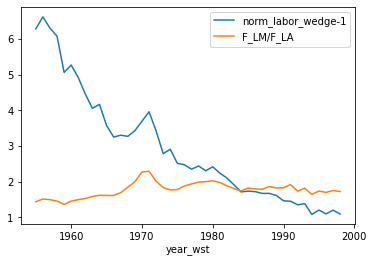

In [13]:
fig, ax = plt.subplots()
df_merged.plot(x = 'year_wst', y = 'norm_labor_wedge-1', ax = ax)
df_merged.plot(x = 'year_wst', y = 'F_LM/F_LA', ax = ax)
plt.legend()

In [14]:
df_merged['YM/YA'] = df_merged['non_prm_GDP']/df_merged['prm_GDP']

In [15]:
df_merged['LM/LA'] = df_merged['non_prm_emp']/df_merged['prm_emp']

In [16]:
df_GDP_emp_picked['YM/YA'] = df_GDP_emp_picked['non_prm_GDP']/df_GDP_emp_picked['prm_GDP']

In [17]:
df_GDP_emp_picked['LM/LA'] = df_GDP_emp_picked['non_prm_emp']/df_GDP_emp_picked['prm_emp']

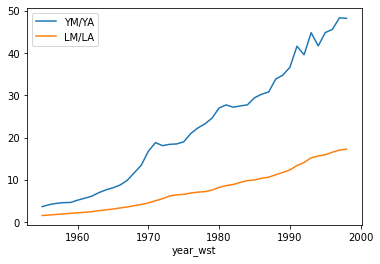

In [18]:
fig, ax = plt.subplots()
df_GDP_emp_picked.plot(x = 'year_wst', y = 'YM/YA', ax = ax)
df_GDP_emp_picked.plot(x = 'year_wst', y = 'LM/LA', ax = ax)
plt.legend()

In [19]:
df_merged.to_csv('../../Data/Results/post_lab_w_test.csv', index = False)

In [20]:
df_merged.loc[0:4]['norm_labor_wedge-1'].mean()

6.064908700598873

In [21]:
df_merged

,year_wst,prm_GDP,non_prm_GDP,prm_emp,non_prm_emp,F_LA,F_LM,F_LM/F_LA,mu_M/mu_A,norm_labor_wedge,norm_labor_wedge-1,YM/YA,LM/LA
0,1955,8863.9,32593.2,1536,2423,3.173923,4.573540,1.440974,5.048960,7.275421,6.275421,3.677072,1.577474
1,1956,8635.4,35858.5,1500,2539,3.166313,4.801847,1.516542,5.021302,7.615016,6.615016,4.152500,1.692667
2,1957,8938.6,39667.8,1467,2686,3.351213,5.021241,1.498335,4.871797,7.299585,6.299585,4.437809,1.830948
3,1958,9254.5,42753.4,1408,2756,3.615039,5.274367,1.459007,4.848288,7.073686,6.073686,4.619742,1.957386
4,1959,9975.0,46441.2,1348,2841,4.069918,5.557905,1.365606,4.438202,6.060836,5.060836,4.655759,2.107567
5,1960,10263.0,53338.6,1340,2954,4.212425,6.139175,1.457397,4.300208,6.267110,5.267110,5.197174,2.204478
6,1961,10607.1,60109.4,1303,3044,4.477287,6.713928,1.499553,3.945175,5.915998,4.915998,5.666902,2.336147
7,1962,10609.0,65081.6,1267,3137,4.605328,7.053792,1.531659,3.559061,5.451268,4.451268,6.134565,2.475927
8,1963,10264.8,71557.0,1194,3240,4.728342,7.509068,1.588098,3.182724,5.054476,4.054476,6.971105,2.713568
9,1964,10457.0,79802.7,1149,3344,5.005527,8.113911,1.620990,3.186548,5.165364,4.165364,7.631510,2.910357
